In [1]:
%matplotlib inline

/Users/shoji/go/src/github.com/mikanfactory/CanDataAnalyzer/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from skbayes.mixture_models import VBBMM

In [3]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [4]:
targetDir = "../data/output/result/"
speedDir = "../data/output/speed/"
brakeDir = "../data/output/brake/"
accelDIr = "../data/output/accel/"
steeringPositiveDir = "../data/output/steeringPositive/"
steeringNegativeDir = "../data/output/steeringNegative/"

In [5]:
df1 = pd.read_csv(speedDir + "result.csv")
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(steeringPositiveDir + "result.csv")
df4.columns = [["id", "steeringPositive"]]
df5 = pd.read_csv(steeringNegativeDir + "result.csv")
df5.columns = [["id", "steeringNegative"]]

In [6]:
df = pd.merge(pd.merge(pd.merge(pd.merge(df1, df2, on="id"), df3, on="id"), df4, on="id"), df5, on="id")

In [7]:
rmf = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]
rmf = rmf[["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive",  "steeringNegative"]]

In [8]:
rmf.describe()

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,24.628866,142.494845,70.706186,127.809278,40.561856,59.819588,45.886598,69.077320
std,42.578259,115.097312,124.268434,342.086072,58.297600,73.636859,102.050874,199.483632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.750000,0.000000,0.000000,1.000000,8.250000,1.000000,0.000000
50%,3.000000,136.500000,5.000000,1.000000,15.000000,23.000000,2.000000,2.000000
75%,26.750000,218.500000,94.750000,26.500000,55.000000,89.500000,25.500000,23.750000
max,188.000000,543.000000,709.000000,2380.000000,321.000000,389.000000,527.000000,1460.000000


# show each grid

In [9]:
nf = rmf.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

# Pair plot

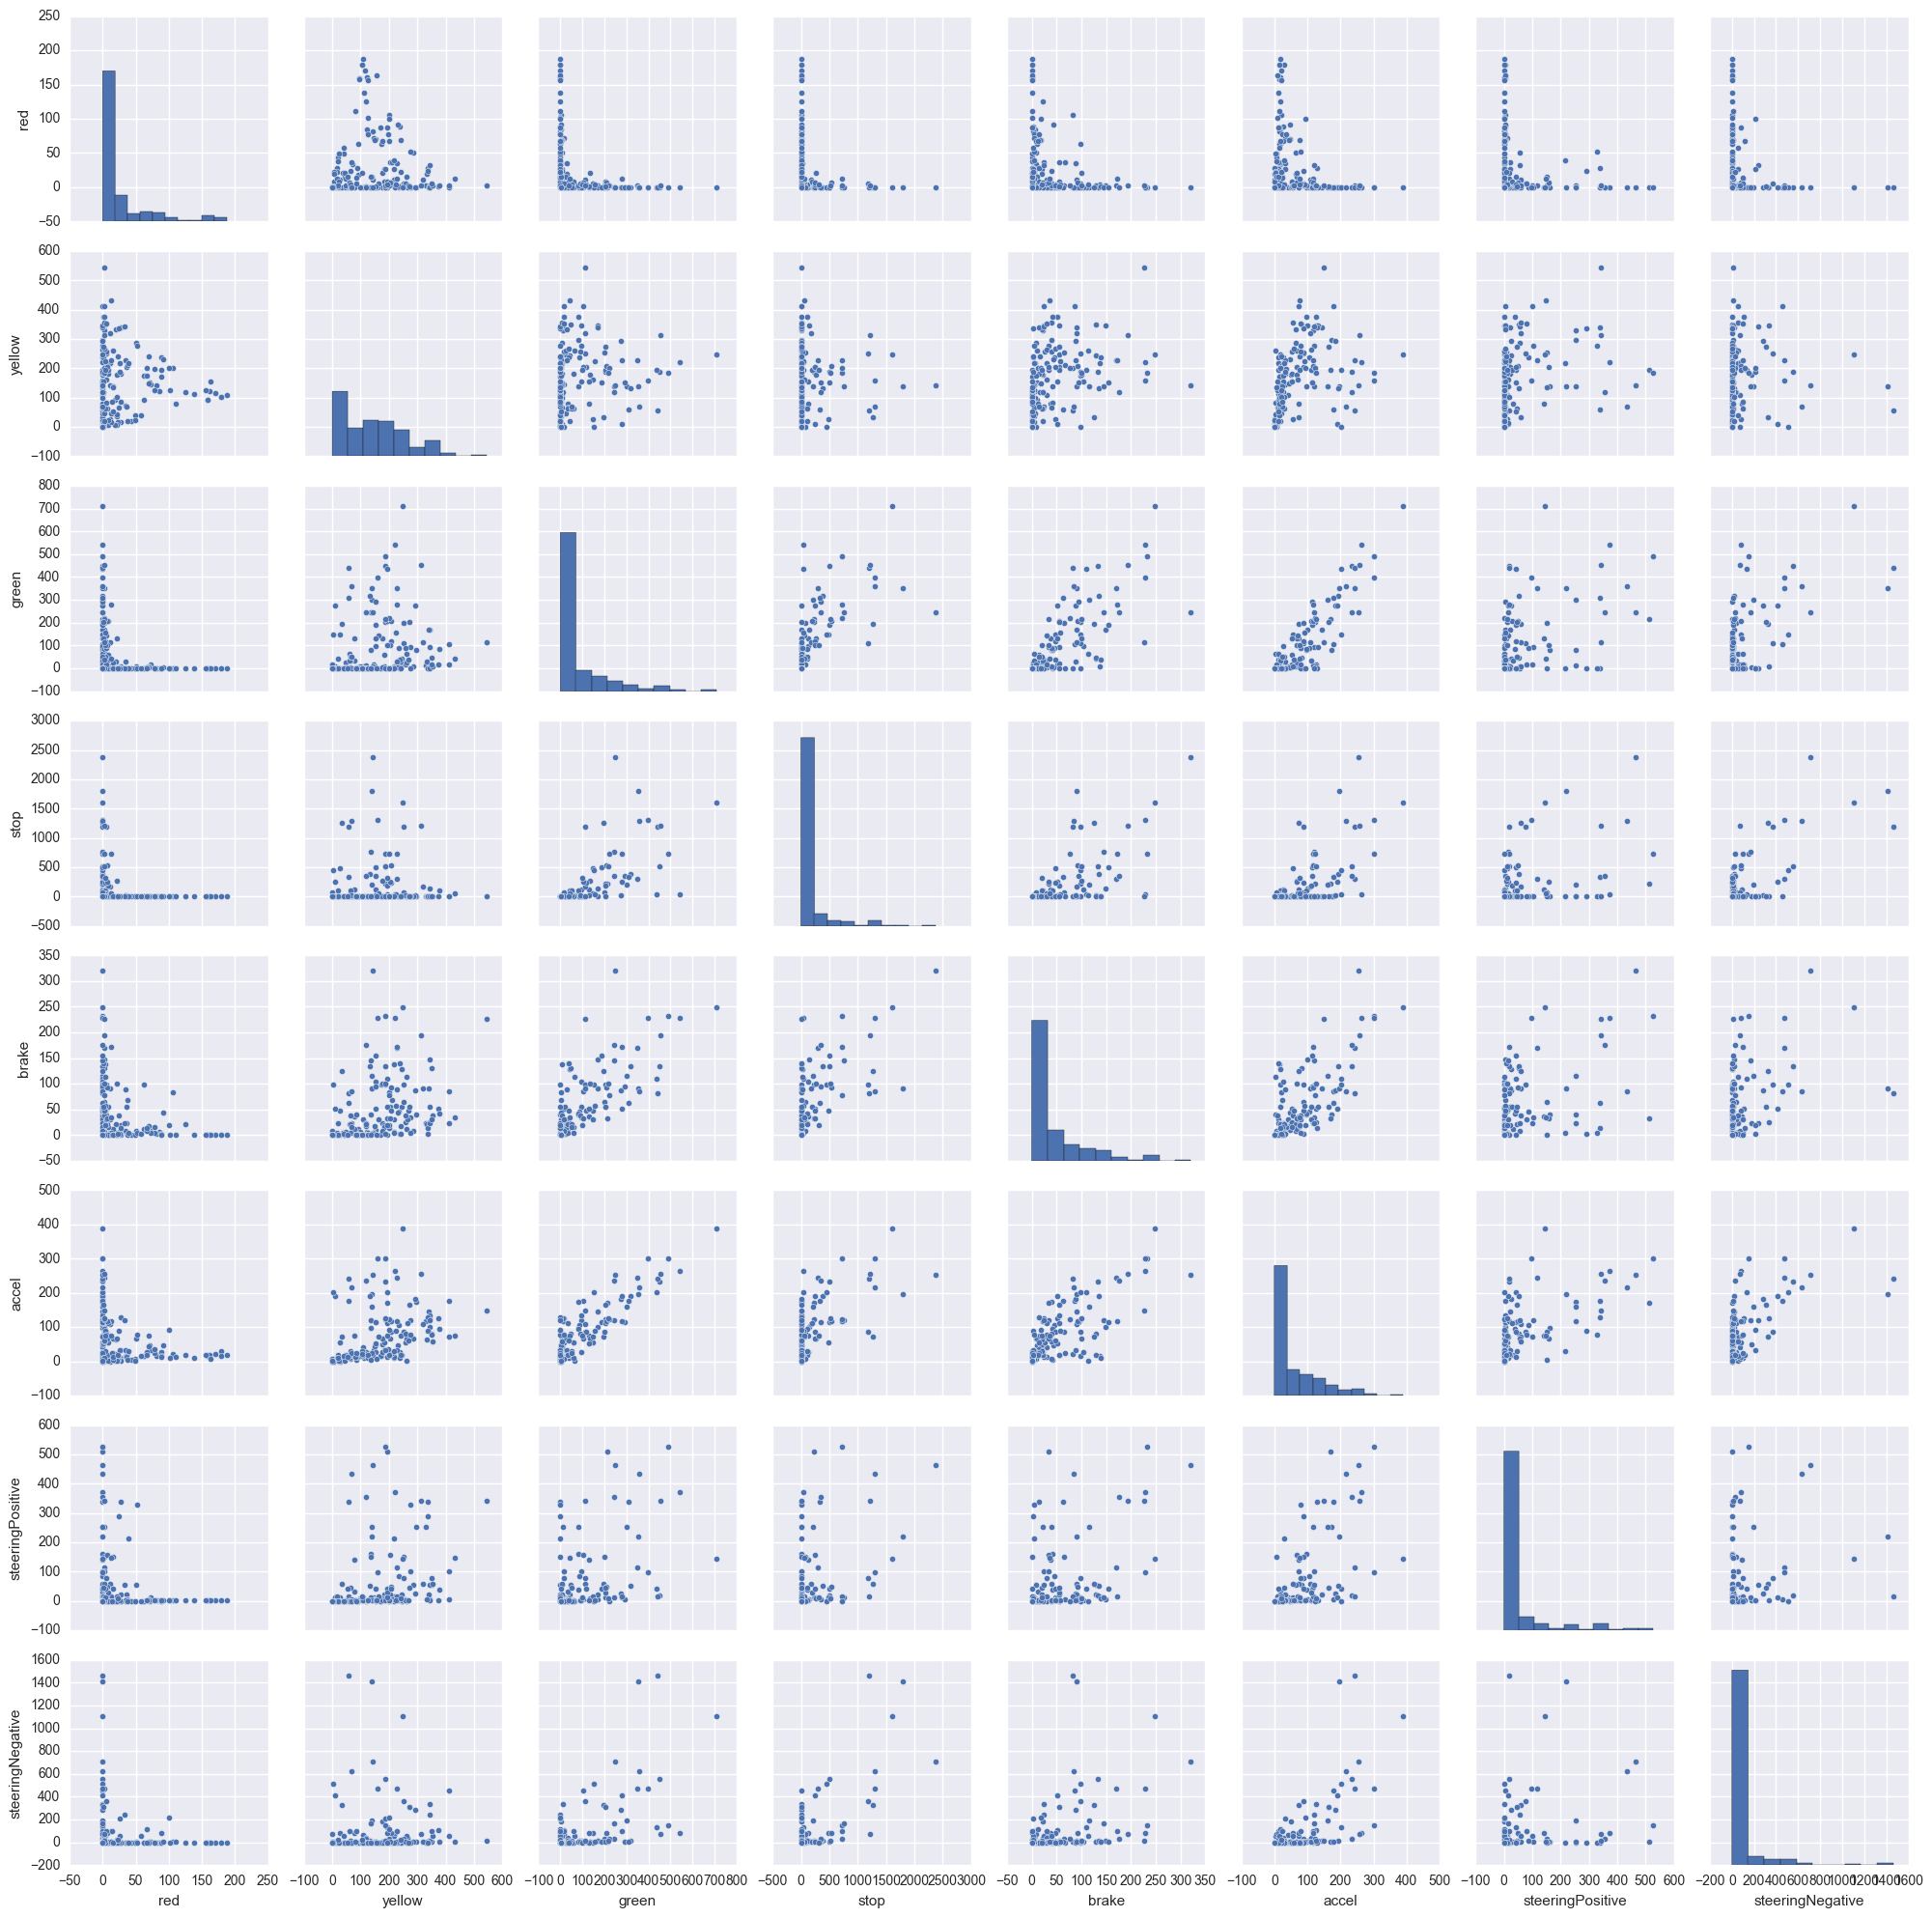

In [13]:
sns.pairplot(rmf)

# Brake

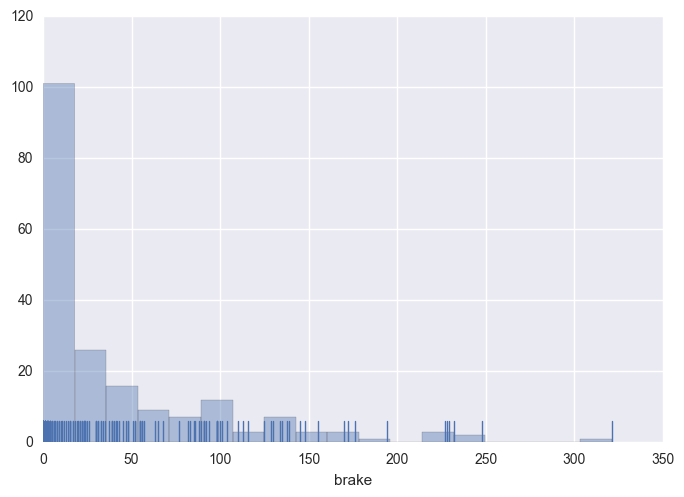

In [14]:
sns.distplot(rmf["brake"], kde=False, rug=True)

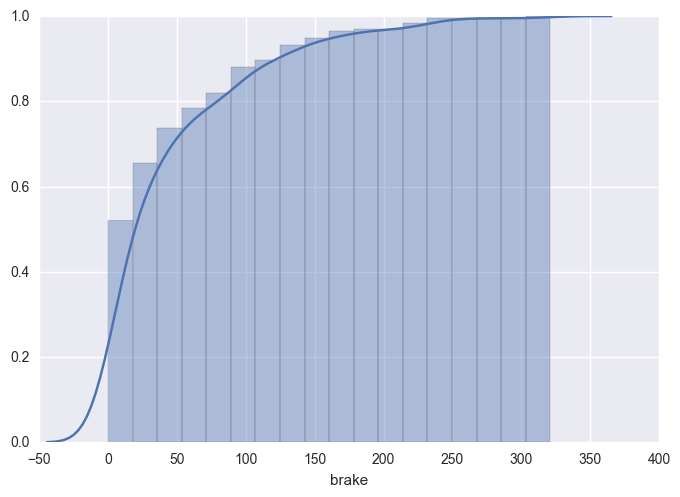

In [15]:
sns.distplot(rmf["brake"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

# Accel

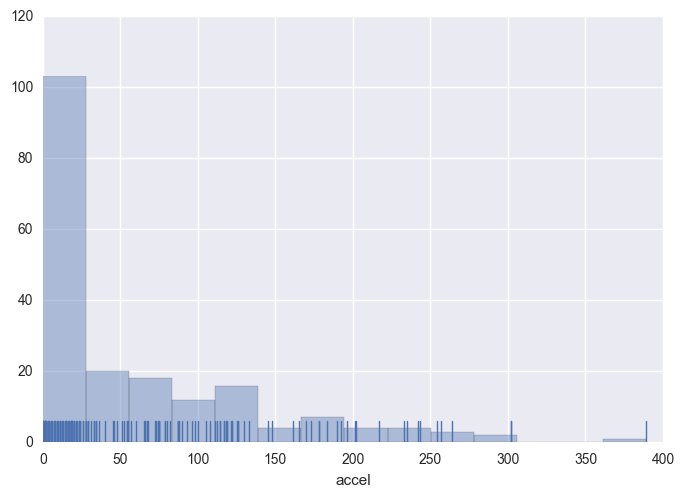

In [16]:
sns.distplot(rmf["accel"], kde=False, rug=True)

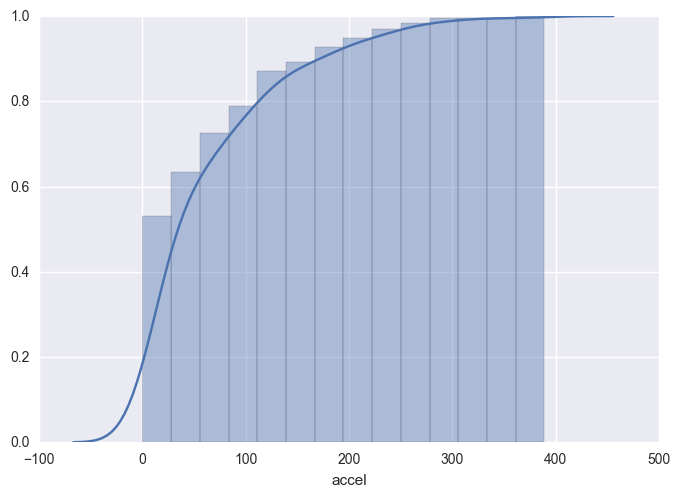

In [17]:
sns.distplot(rmf["accel"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

# SteeringPositive

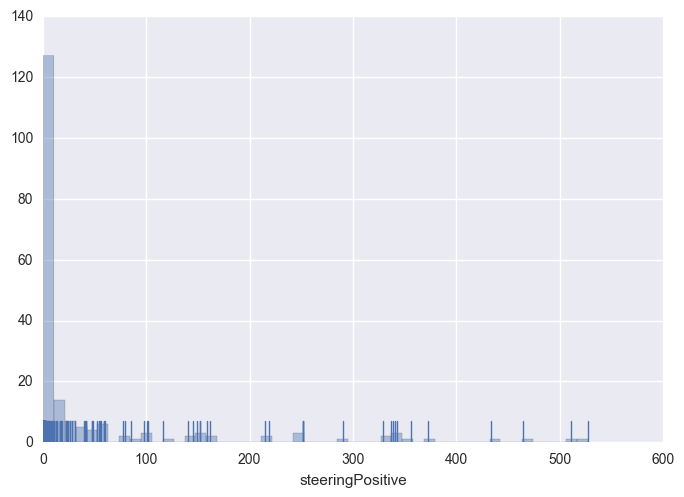

In [18]:
sns.distplot(rmf["steeringPositive"], kde=False, rug=True)

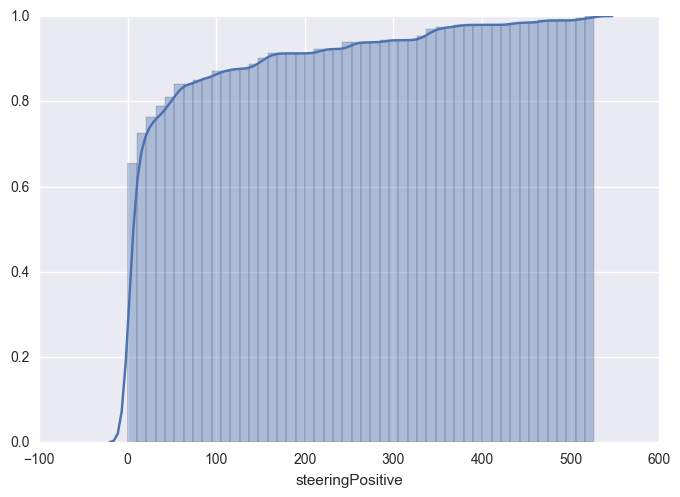

In [19]:
sns.distplot(rmf["steeringPositive"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

In [20]:
rmf.sort_values("steeringPositive", ascending=False)[:10]

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
454,0,186,489,729,232,302,527,153
379,0,193,214,224,33,170,511,2
1323,0,143,247,2380,321,254,465,710
955,0,68,358,1295,85,217,434,628
586,0,220,543,43,228,264,373,81
747,0,120,244,345,176,235,356,29
1488,3,543,114,13,227,148,343,13
1326,3,314,453,1214,194,257,341,71
869,28,338,0,0,14,130,339,0
728,0,58,308,333,63,178,337,9


# SteeringNegative

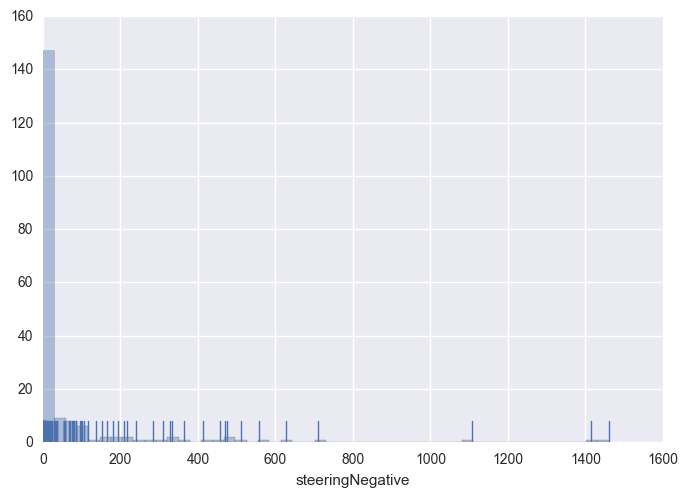

In [21]:
sns.distplot(rmf["steeringNegative"], kde=False, rug=True)

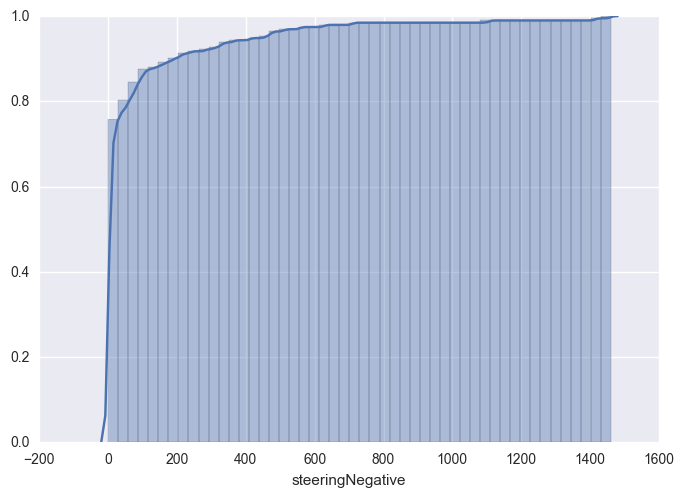

In [22]:
sns.distplot(rmf["steeringNegative"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

In [23]:
rmf.sort_values("steeringNegative", ascending=False)[:10]

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
841,0,57,439,1197,82,242,17,1460
527,0,140,352,1802,91,196,219,1415
1528,0,247,709,1609,248,389,145,1106
1323,0,143,247,2380,321,254,465,710
955,0,68,358,1295,85,217,434,628
406,0,187,448,509,134,233,18,557
632,0,2,150,451,98,202,1,511
874,0,159,398,1307,229,302,98,475
104,3,227,351,302,170,243,116,471
103,0,412,104,11,86,178,6,457


# VBGMM (raw)

In [110]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=100).fit(rmf)
set(vb.predict(rmf))

{0, 1, 2, 3, 4, 5, 6}

In [111]:
pred = zip(rmf.index, vb.predict(rmf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters1.csv", result, delimiter=",", fmt="%d")

In [112]:
ref = pd.DataFrame(vb.means_)
ref.columns = [["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
0,11.244870,298.541347,65.992207,32.485512,48.241451,95.305360,137.484049,11.008350
1,36.932586,57.107714,5.069603,6.281208,4.161609,11.168450,3.486372,3.843253
2,5.605264,161.122053,264.231789,1064.632991,128.474602,165.817946,175.896202,322.042922
3,3.820750,165.189215,204.154379,307.346427,85.189020,120.788606,62.545102,109.284094
4,27.586074,229.467750,18.762150,9.822811,47.195110,48.482253,12.604751,62.379924
5,4.103998,154.599781,302.325830,186.579976,108.421868,184.581666,277.267855,54.562126
6,4.104761,152.748949,377.604149,1270.718321,152.753971,228.960695,151.638401,886.121737


# VBBMM (binary)

In [30]:
bf = rmf.copy()

In [31]:
bf["red"] = bf["red"].mask(bf["red"] > 0, 1)
bf["yellow"] = bf["yellow"].mask(bf["yellow"] < 50, 0)
bf["yellow"] = bf["yellow"].mask(bf["yellow"] >= 50, 1)
bf["green"] = bf["green"].mask(bf["green"] > 0, 1)
bf["stop"] = bf["stop"].mask(bf["stop"] > 0, 1)

In [32]:
bf["brake"] = bf["brake"].mask(bf["brake"] < 50, 0)
bf["brake"] = bf["brake"].mask(bf["brake"] >= 50, 1)

In [33]:
bf["accel"] = bf["accel"].mask(bf["accel"] < 100, 0)
bf["accel"] = bf["accel"].mask(bf["accel"] >= 100, 1)

In [34]:
bf["steeringPositive"] = bf["steeringPositive"].mask(bf["steeringPositive"] < 10, 0)
bf["steeringPositive"] = bf["steeringPositive"].mask(bf["steeringPositive"] >= 10, 1)

In [35]:
bf["steeringNegative"] = bf["steeringNegative"].mask(bf["steeringNegative"] < 10, 0)
bf["steeringNegative"] = bf["steeringNegative"].mask(bf["steeringNegative"] >= 10, 1)

In [36]:
bf.describe()

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.644330,0.711340,0.639175,0.515464,0.278351,0.231959,0.350515,0.335052
std,0.479954,0.454312,0.481482,0.501054,0.449347,0.423175,0.478366,0.473230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
vb = VBBMM(n_components=7).fit(bf)
set(vb.predict(bf))

{0, 2, 3, 4, 5, 6}

In [132]:
pred = zip(bf.index, vb.predict(bf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters2.csv", result, delimiter=",", fmt="%d")

In [139]:
ref = pd.DataFrame(vb.means_.T)
ref.columns = [["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
0,0.000871,0.999129,0.999129,0.999129,0.999129,0.999129,0.999129,0.999129
1,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
2,0.989982,0.989982,0.010018,0.010018,0.010018,0.989982,0.989982,0.989982
3,0.515815,0.903273,0.999483,0.999483,0.999483,0.999483,0.698025,0.999483
4,0.999815,0.607046,0.000185,0.000185,0.000185,0.000185,0.101224,0.197188
5,0.999700,0.999700,0.999700,0.999700,0.369043,0.000300,0.470128,0.251017
6,0.355561,0.560308,0.800767,0.479808,0.145991,0.177058,0.279870,0.189998


# VBGMM (normalize only)

In [39]:
tf = rmf.copy()

In [40]:
tf["brake"] = tf["brake"].mask(tf["brake"] < 50, 0)

In [41]:
tf["accel"] = tf["accel"].mask(tf["accel"] < 10, 0)

In [42]:
tf["steeringPositive"] = tf["steeringPositive"].mask(tf["steeringPositive"] < 10, 0)

In [43]:
tf["steeringNegative"] = tf["steeringNegative"].mask(tf["steeringNegative"] < 10, 0)

In [44]:
tf = tf.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [45]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.001).fit(tf)
set(vb.predict(tf))

{0, 1, 2, 3, 4, 5, 6}

In [46]:
pred = zip(tf.index, vb.predict(tf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters3.csv", result, delimiter=",", fmt="%d")

# VBGMM (threshold only)

In [47]:
tf = rmf.copy()

In [48]:
tf["brake"] = tf["brake"].mask(tf["brake"] < 50, 0)

In [49]:
tf["accel"] = tf["accel"].mask(tf["accel"] < 10, 0)

In [50]:
tf["steeringPositive"] = tf["steeringPositive"].mask(tf["steeringPositive"] < 10, 0)

In [51]:
tf["steeringNegative"] = tf["steeringNegative"].mask(tf["steeringNegative"] < 10, 0)

In [52]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.001).fit(tf)
set(vb.predict(tf))

{0, 1, 2, 3, 4, 5, 6}

In [53]:
pred = zip(tf.index, vb.predict(tf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters4.csv", result, delimiter=",", fmt="%d")

In [54]:
ref = pd.DataFrame(vb.means_)
ref.columns = [["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
0,36.393384,76.309449,5.279029,4.699464,0.308777,13.073780,1.856695,5.909887
1,4.505842,155.619427,181.513518,331.072751,64.279308,108.467422,86.668280,30.015181
2,5.604046,161.079625,264.439910,1065.697230,127.283434,165.829067,175.757192,322.334124
3,17.425020,272.292335,55.879655,20.996827,45.117331,76.685615,66.871194,60.263977
4,12.314130,142.744565,158.848011,1253.851489,176.845152,156.520140,254.871396,389.122645
5,3.060096,145.522122,340.085304,295.893108,130.262313,206.068262,154.037683,286.538480
6,6.156549,146.628545,392.668031,1183.788610,113.425091,221.505939,106.421597,1012.201896


# VBGMM (threshold and normalize)

In [56]:
tf = rmf.copy()

In [57]:
tf["brake"] = tf["brake"].mask(tf["brake"] < 50, 0)

In [58]:
tf["accel"] = tf["accel"].mask(tf["accel"] < 10, 0)

In [59]:
tf["steeringPositive"] = tf["steeringPositive"].mask(tf["steeringPositive"] < 10, 0)

In [60]:
tf["steeringNegative"] = tf["steeringNegative"].mask(tf["steeringNegative"] < 10, 0)

In [61]:
tf = tf.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [62]:
tf.cov()

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
red,0.051293,-0.000030,-0.012001,-0.006534,-0.010453,-0.011109,-0.007938,-0.004926
yellow,-0.000030,0.044929,0.008337,0.001716,0.013455,0.019025,0.012739,0.002331
green,-0.012001,0.008337,0.030721,0.017623,0.025779,0.029739,0.017107,0.014606
stop,-0.006534,0.001716,0.017623,0.020659,0.018249,0.017889,0.012383,0.014508
brake,-0.010453,0.013455,0.025779,0.018249,0.036392,0.026580,0.016876,0.011629
accel,-0.011109,0.019025,0.029739,0.017889,0.026580,0.036411,0.023021,0.016290
steeringPositive,-0.007938,0.012739,0.017107,0.012383,0.016876,0.023021,0.037851,0.006444
steeringNegative,-0.004926,0.002331,0.014606,0.014508,0.011629,0.016290,0.006444,0.018718


In [63]:
tf.describe()

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.131005,0.262421,0.099727,0.053701,0.101888,0.151803,0.084939,0.046766
std,0.226480,0.211966,0.175273,0.143734,0.190766,0.190816,0.194554,0.136816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.067680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.015957,0.251381,0.007052,0.000420,0.000000,0.059126,0.000000,0.000000
75%,0.142287,0.402394,0.133639,0.011134,0.171340,0.230077,0.048387,0.016267
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.001).fit(tf)
set(vb.predict(tf))

{0, 1, 2, 3, 4, 5, 6}

In [65]:
pred = zip(tf.index, vb.predict(tf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters5.csv", result, delimiter=",", fmt="%d")

In [66]:
ref = pd.DataFrame(vb.means_)
ref.columns = [["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
0,0.456544,0.317306,0.009225,0.001728,0.008956,0.083317,0.002970,0.017186
1,0.058141,0.412849,0.110050,0.024592,0.171132,0.158252,0.070175,0.008120
2,0.013321,0.291767,0.464219,0.312559,0.473918,0.559779,0.642718,0.149340
3,0.016954,0.309091,0.326921,0.182764,0.290302,0.346943,0.069608,0.119884
4,0.076353,0.632855,0.043917,0.005972,0.077282,0.266113,0.296899,0.061154
5,0.056306,0.069083,0.008601,0.003217,0.001365,0.019201,0.005748,0.004284
6,0.032746,0.270037,0.553849,0.497408,0.353360,0.569438,0.201946,0.693308
